<h1> Imports </h1>

In [ ]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt


<h1>Image Feature Extraction</h1>

In [ ]:
imagefile = 'datasets/numbers/t10k-images.idx3-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile)

plt.imshow(imagearray[90], cmap=plt.cm.binary)

file = 'datasets/numbers/t10k-labels.idx1-ubyte'
array = idx2numpy.convert_from_file(file)
array[90]

<h1> Working with Audio Modality </h1>

In [ ]:
# Gathering list of files to dynamically iterate through
audioFiles = np.array([filename for filename in os.listdir("datasets/recordings")])
len(audioFiles)

<h3>Exploratory data analysis of audio dataset</h3>

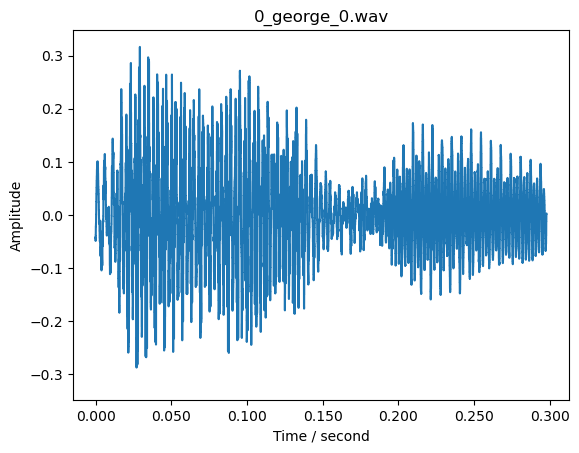

Frequencies:
[0.00000000e+00 3.35565363e+00 6.71130726e+00 ... 2.20399330e+04
 2.20432887e+04 2.20466443e+04]


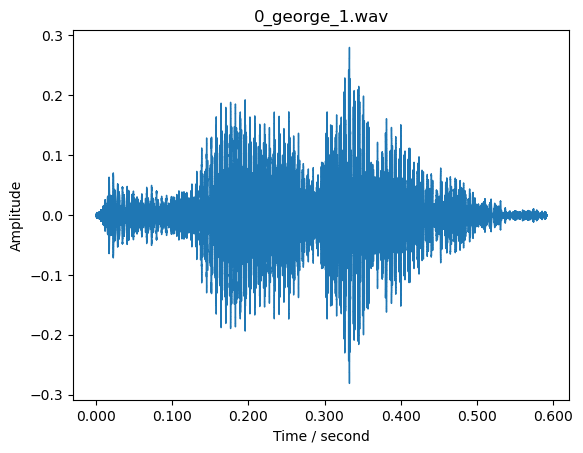

Frequencies:
[0.00000000e+00 1.69237854e+00 3.38475708e+00 ... 2.20449229e+04
 2.20466152e+04 2.20483076e+04]


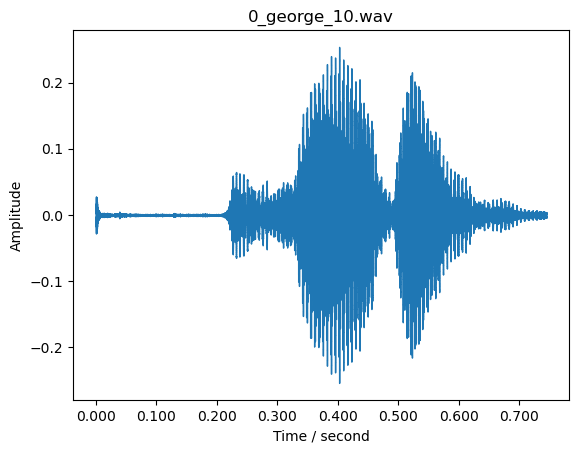

Frequencies:
[0.00000000e+00 1.34271100e+00 2.68542199e+00 ... 2.20459719e+04
 2.20473146e+04 2.20486573e+04]


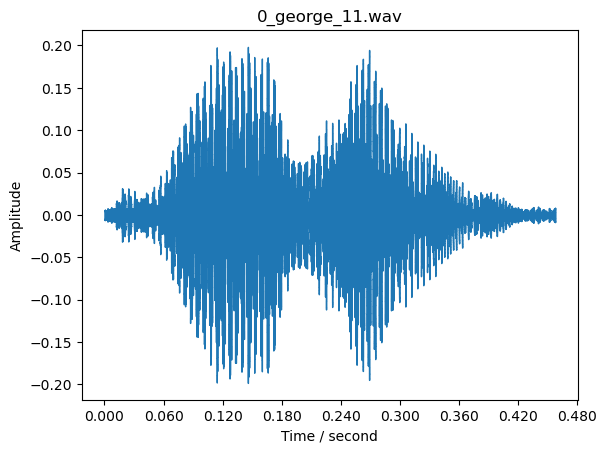

Frequencies:
[0.00000000e+00 2.18511545e+00 4.37023090e+00 ... 2.20434447e+04
 2.20456298e+04 2.20478149e+04]


In [11]:
import os
from random import randint
import matplotlib.pyplot as plt
import librosa

# Randomly sample and display the waves and frequencies of 4 recordings in our dataset
randInt = [randint(0, len(audioFiles)) for i in range(4)]
for i in range(4):
    signal, sample_rate = librosa.load("./datasets/recordings/" + audioFiles[i])

    plt.figure(i)
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.title(audioFiles[i])
    plt.show()

    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    print("Frequencies:")
    print(k/T)

<h3>Audio feature extraction</h3>

In [14]:
# Feature Extraction
import pandas as pd

mfccList, zcrList, mel_specList = [], [], []

for i in audioFiles:
    signal, sample_rate = librosa.load("./datasets/recordings/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    mfccList.append(df_mfccs)
    zcrList.append(df_zero_crossing_rate)
    mel_specList.append(df_mel_spectrogram)

len(zcrList)

IndexError: index 11 is out of bounds for axis 0 with size 11